<a href="https://colab.research.google.com/github/y-patankar/StockMarket/blob/main/Costo_Random_Data(all_data)(7th_Day).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas.tseries.offsets import BDay
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('COST_Shuffled(all data).csv')

In [ ]:
df.set_index('Date', drop=False, inplace=True)
df

,Unnamed: 0,Date,Open,High,Low,Close,date-1,open-1,high-1,low-1,...,high-4,low-4,close-4,date-5,open-5,high-5,low-5,close-5,close-7day,close-14day
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-21,0,2016-06-21,157.070007,157.899994,156.660004,157.199997,2016-06-20,157.380005,158.380005,156.449997,...,156.779999,154.660004,154.860001,2016-06-14,154.550003,156.360001,153.570007,155.869995,154.869995,152.520004
2023-02-10,1,2023-02-10,498.510010,500.549988,495.380005,499.989990,2023-02-09,505.290009,509.160004,498.420013,...,517.219971,512.270020,515.590027,2023-02-03,519.130005,521.549988,512.500000,514.799988,517.909973,492.609985
2023-08-07,2,2023-08-07,554.989990,559.559998,554.989990,558.409973,2023-08-04,561.070007,561.289978,551.409973,...,562.880005,554.539978,555.469971,2023-07-31,563.000000,564.289978,559.049988,560.669983,561.830017,553.590027
2020-06-23,3,2020-06-23,301.730011,304.899994,300.730011,301.290009,2020-06-22,299.700012,301.480011,298.250000,...,302.000000,298.899994,299.609985,2020-06-16,301.350006,302.739990,299.220001,301.359985,298.700012,306.640015
2019-12-03,4,2019-12-03,295.130005,296.190002,292.700012,295.670013,2019-12-02,299.750000,300.200012,294.269989,...,301.350006,298.820007,301.239990,2019-11-25,300.290009,300.630005,297.549988,299.049988,300.269989,300.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-01-30,5659,2007-01-30,55.580002,55.830002,54.980000,55.299999,2007-01-29,54.990002,55.889999,54.660000,...,57.180000,56.480000,57.060001,2007-01-23,56.369999,57.139999,56.119999,56.439999,56.770000,54.029999
2010-12-15,5660,2010-12-15,71.010002,71.449997,70.889999,71.050003,2010-12-14,70.699997,71.540001,70.599998,...,71.129997,69.279999,71.019997,2010-12-08,69.379997,69.709999,68.529999,69.250000,69.190002,67.540001
2022-10-31,5661,2022-10-31,509.640015,509.640015,500.500000,501.500000,2022-10-28,497.299988,512.820007,495.970001,...,500.190002,490.500000,499.059998,2022-10-24,481.609985,498.000000,481.010010,496.970001,464.619995,472.019989


In [ ]:
df = df[['Open','Close', 'open-5', 'high-5','low-5','close-5','open-4', 'high-4','low-4','close-4','open-3', 'high-3','low-3','close-3','open-2', 'high-2','low-2','close-2','open-1', 'high-1','low-1','close-1','close-7day','close-14day']]
df

,Open,Close,open-5,high-5,low-5,close-5,open-4,high-4,low-4,close-4,...,open-2,high-2,low-2,close-2,open-1,high-1,low-1,close-1,close-7day,close-14day
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-21,157.070007,157.199997,154.550003,156.360001,153.570007,155.869995,155.699997,156.779999,154.660004,154.860001,...,157.029999,157.250000,155.759995,155.889999,157.380005,158.380005,156.449997,156.479996,154.869995,152.520004
2023-02-10,498.510010,499.989990,519.130005,521.549988,512.500000,514.799988,514.440002,517.219971,512.270020,515.590027,...,511.290009,512.179993,501.559998,503.809998,505.290009,509.160004,498.420013,500.630005,517.909973,492.609985
2023-08-07,554.989990,558.409973,563.000000,564.289978,559.049988,560.669983,560.630005,562.880005,554.539978,555.469971,...,553.530029,560.349976,552.219971,557.690002,561.070007,561.289978,551.409973,552.039978,561.830017,553.590027
2020-06-23,301.730011,301.290009,301.350006,302.739990,299.220001,301.359985,301.019989,302.000000,298.899994,299.609985,...,300.179993,301.899994,298.640015,299.899994,299.700012,301.480011,298.250000,300.450012,298.700012,306.640015
2019-12-03,295.130005,295.670013,300.290009,300.630005,297.549988,299.049988,299.260010,301.350006,298.820007,301.239990,...,300.820007,300.890015,299.660004,299.809998,299.750000,300.200012,294.269989,297.390015,300.269989,300.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-01-30,55.580002,55.299999,56.369999,57.139999,56.119999,56.439999,56.500000,57.180000,56.480000,57.060001,...,55.849998,55.849998,55.139999,55.360001,54.990002,55.889999,54.660000,55.270000,56.770000,54.029999
2010-12-15,71.010002,71.050003,69.379997,69.709999,68.529999,69.250000,69.699997,71.129997,69.279999,71.019997,...,71.129997,71.489998,70.529999,70.739998,70.699997,71.540001,70.599998,71.209999,69.190002,67.540001
2022-10-31,509.640015,501.500000,481.609985,498.000000,481.010010,496.970001,493.320007,500.190002,490.500000,499.059998,...,499.809998,503.010010,494.140015,496.540009,497.299988,512.820007,495.970001,510.869995,464.619995,472.019989


In [ ]:
columns_to_exclude = ['Open', 'Close','close-7day','close-14day']

# Select only the columns to include in calculations
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]

# Calculate the minimum and maximum values for the selected columns
df['Row_Min'] = df[columns_to_include].min(axis=1)
df['Row_Max'] = df[columns_to_include].max(axis=1)

<ipython-input-46-1bfd3f64c4dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Row_Min'] = df[columns_to_include].min(axis=1)
<ipython-input-46-1bfd3f64c4dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Row_Max'] = df[columns_to_include].max(axis=1)


In [ ]:
if 'Open' not in df.columns:
    print("Column 'Open' not found.")
else:

    normalized_df = df.copy()

    # Exclude columns that should not be normalized (e.g., 'Date')
    exclude_columns = ['Date','Index']
    columns_to_normalize = [col for col in normalized_df.columns if col not in exclude_columns]

    # Perform row-wise division
    normalized_df[columns_to_normalize] = normalized_df[columns_to_normalize].div(normalized_df['Open'], axis=0)

    # Step 3: Handle potential division by zero errors
    # Replace infinite values with NaN or another placeholder
    normalized_df.replace([np.inf, -np.inf], np.nan, inplace=True)


    print(normalized_df.head())

            Open     Close    open-5    high-5     low-5   close-5    open-4  \
Date                                                                           
2016-06-21   1.0  1.000828  0.983956  0.995480  0.977717  0.992360  0.991278   
2023-02-10   1.0  1.002969  1.041363  1.046218  1.028064  1.032677  1.031955   
2023-08-07   1.0  1.006162  1.014433  1.016757  1.007315  1.010234  1.010162   
2020-06-23   1.0  0.998542  0.998741  1.003347  0.991681  0.998774  0.997647   
2019-12-03   1.0  1.001830  1.017484  1.018636  1.008200  1.013282  1.013994   

              high-4     low-4   close-4  ...    open-2    high-2     low-2  \
Date                                      ...                                 
2016-06-21  0.998154  0.984657  0.985930  ...  0.999745  1.001146  0.991660   
2023-02-10  1.037532  1.027602  1.034262  ...  1.025636  1.027422  1.006118   
2023-08-07  1.014216  0.999189  1.000865  ...  0.997369  1.009658  0.995009   
2020-06-23  1.000895  0.990621  0.992974  ..

In [ ]:
exclude_columns = ['Date']

# Get the list of columns to multiply
columns_to_multiply = [col for col in normalized_df.columns if col not in exclude_columns]

# Multiply the selected columns by 10
normalized_df[columns_to_multiply] = normalized_df[columns_to_multiply].mul(10)

In [ ]:
df= normalized_df

In [ ]:
X = df.drop(columns=['Close','Open','close-7day','close-14day'])
y = df['close-7day']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split temp into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Checking the size of each set
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (4531, 22), (4531,)
Validation set: (566, 22), (566,)
Test set: (567, 22), (567,)


In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)

[0]	validation_0-rmse:125.59949
[1]	validation_0-rmse:88.29244
[2]	validation_0-rmse:61.86295
[3]	validation_0-rmse:43.49222
[4]	validation_0-rmse:30.53388
[5]	validation_0-rmse:21.56496
[6]	validation_0-rmse:15.44002
[7]	validation_0-rmse:11.25361
[8]	validation_0-rmse:8.47559
[9]	validation_0-rmse:6.76169
[10]	validation_0-rmse:5.75150
[11]	validation_0-rmse:5.21909
[12]	validation_0-rmse:4.96280
[13]	validation_0-rmse:4.86064
[14]	validation_0-rmse:4.85313
[15]	validation_0-rmse:4.89841
[16]	validation_0-rmse:4.96860
[17]	validation_0-rmse:4.95849
[18]	validation_0-rmse:4.99780


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.01079
[20]	validation_0-rmse:5.02680
[21]	validation_0-rmse:5.02841
[22]	validation_0-rmse:5.02093
[23]	validation_0-rmse:5.01803


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the validation set
y_val_pred = xgb_model.predict(X_val)

# Calculate Mean Squared Error on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation Mean Squared Error: {val_mse}")

Validation Mean Squared Error: 23.552886147168664


In [ ]:
# Make predictions on the test set
y_test_pred = xgb_model.predict(X_test)

# Calculate Mean Squared Error on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse}")

Test Mean Squared Error: 31.751894961924968


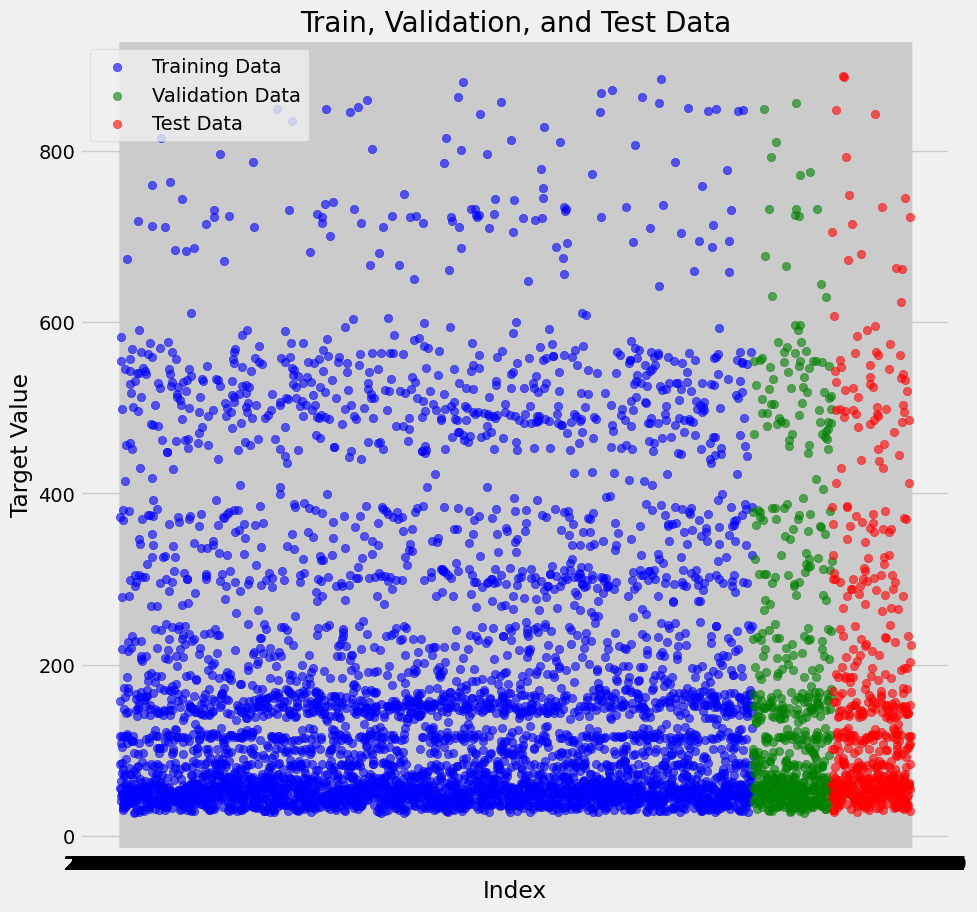

In [ ]:
# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined

plt.figure(figsize=(10, 10))

# Plot training data
plt.scatter(X_train.index, y_train, color='blue', label='Training Data', alpha=0.6)

# Plot validation data
plt.scatter(X_val.index, y_val, color='green', label='Validation Data', alpha=0.6)

# Plot test data
plt.scatter(X_test.index, y_test, color='red', label='Test Data', alpha=0.6)

# Add title and labels
plt.title('Train, Validation, and Test Data')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Add legend
plt.legend()

# Show plot
plt.show()

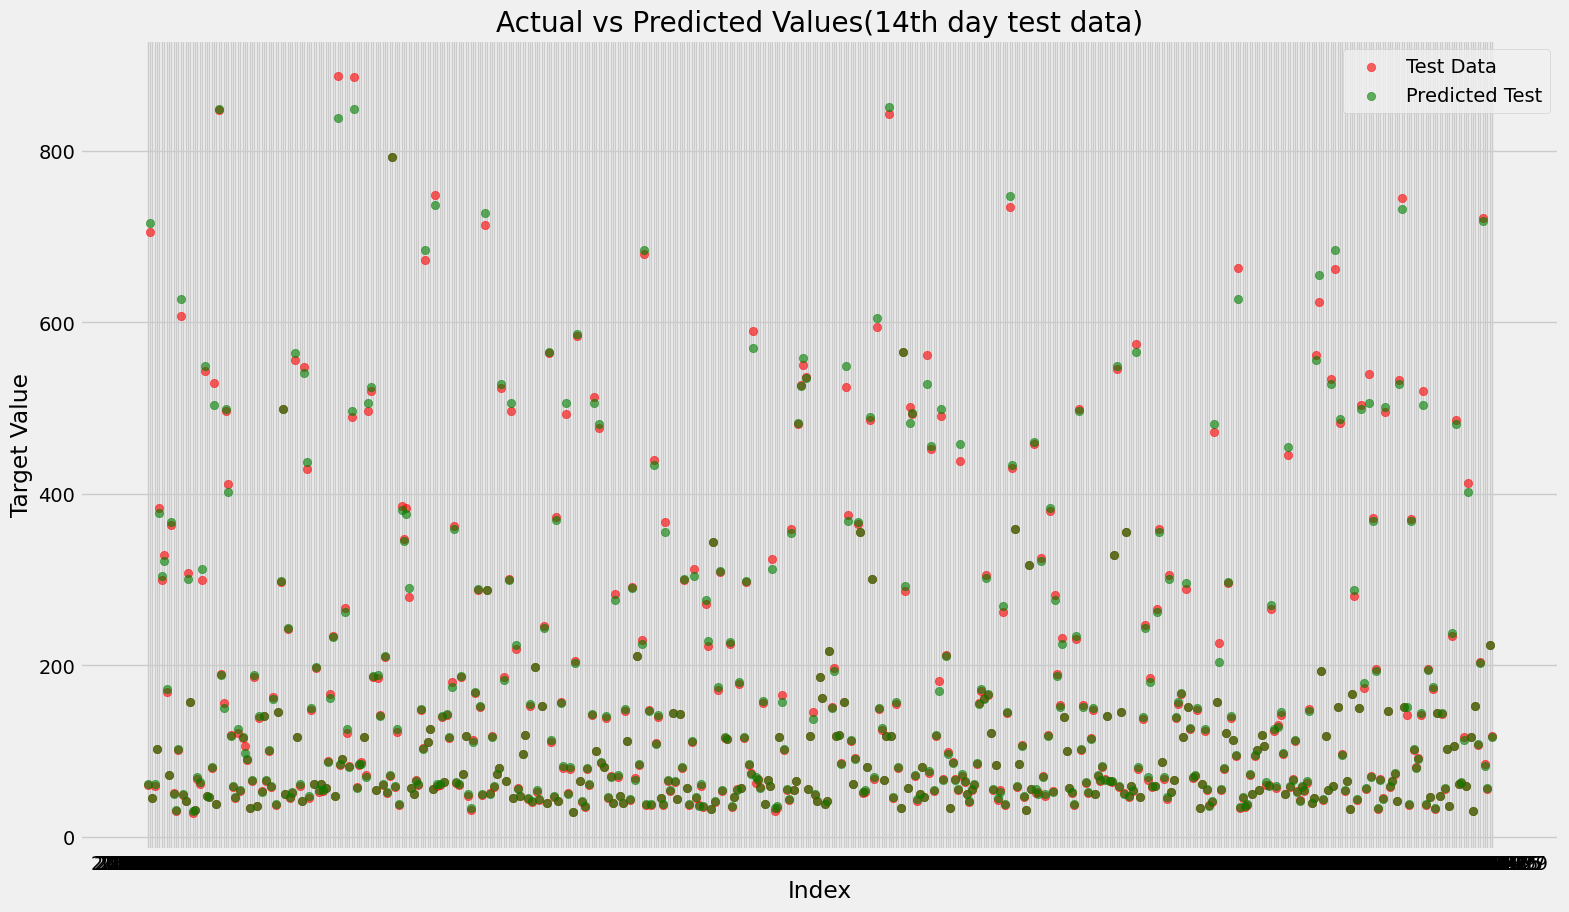

In [ ]:
#test data
plt.figure(figsize=(17, 10))
plt.scatter(X_test.index, y_test, color='red', label='Test Data', alpha=0.6)
plt.scatter(X_test.index, y_test_pred, color='green', label='Predicted Test', alpha=0.6)
plt.title('Actual vs Predicted Values(14th day test data)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
paired_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

paired_data

,Actual,Predicted
Date,,
2008-03-26,60.860001,61.263069
2024-04-15,704.880005,716.348328
2009-04-28,45.770000,45.328545
2007-08-09,59.799999,60.995594
2013-03-28,102.120003,102.038933
...,...,...
2024-02-26,722.179993,717.969299
2011-11-25,84.480003,83.048729
2006-05-15,55.529999,56.598240


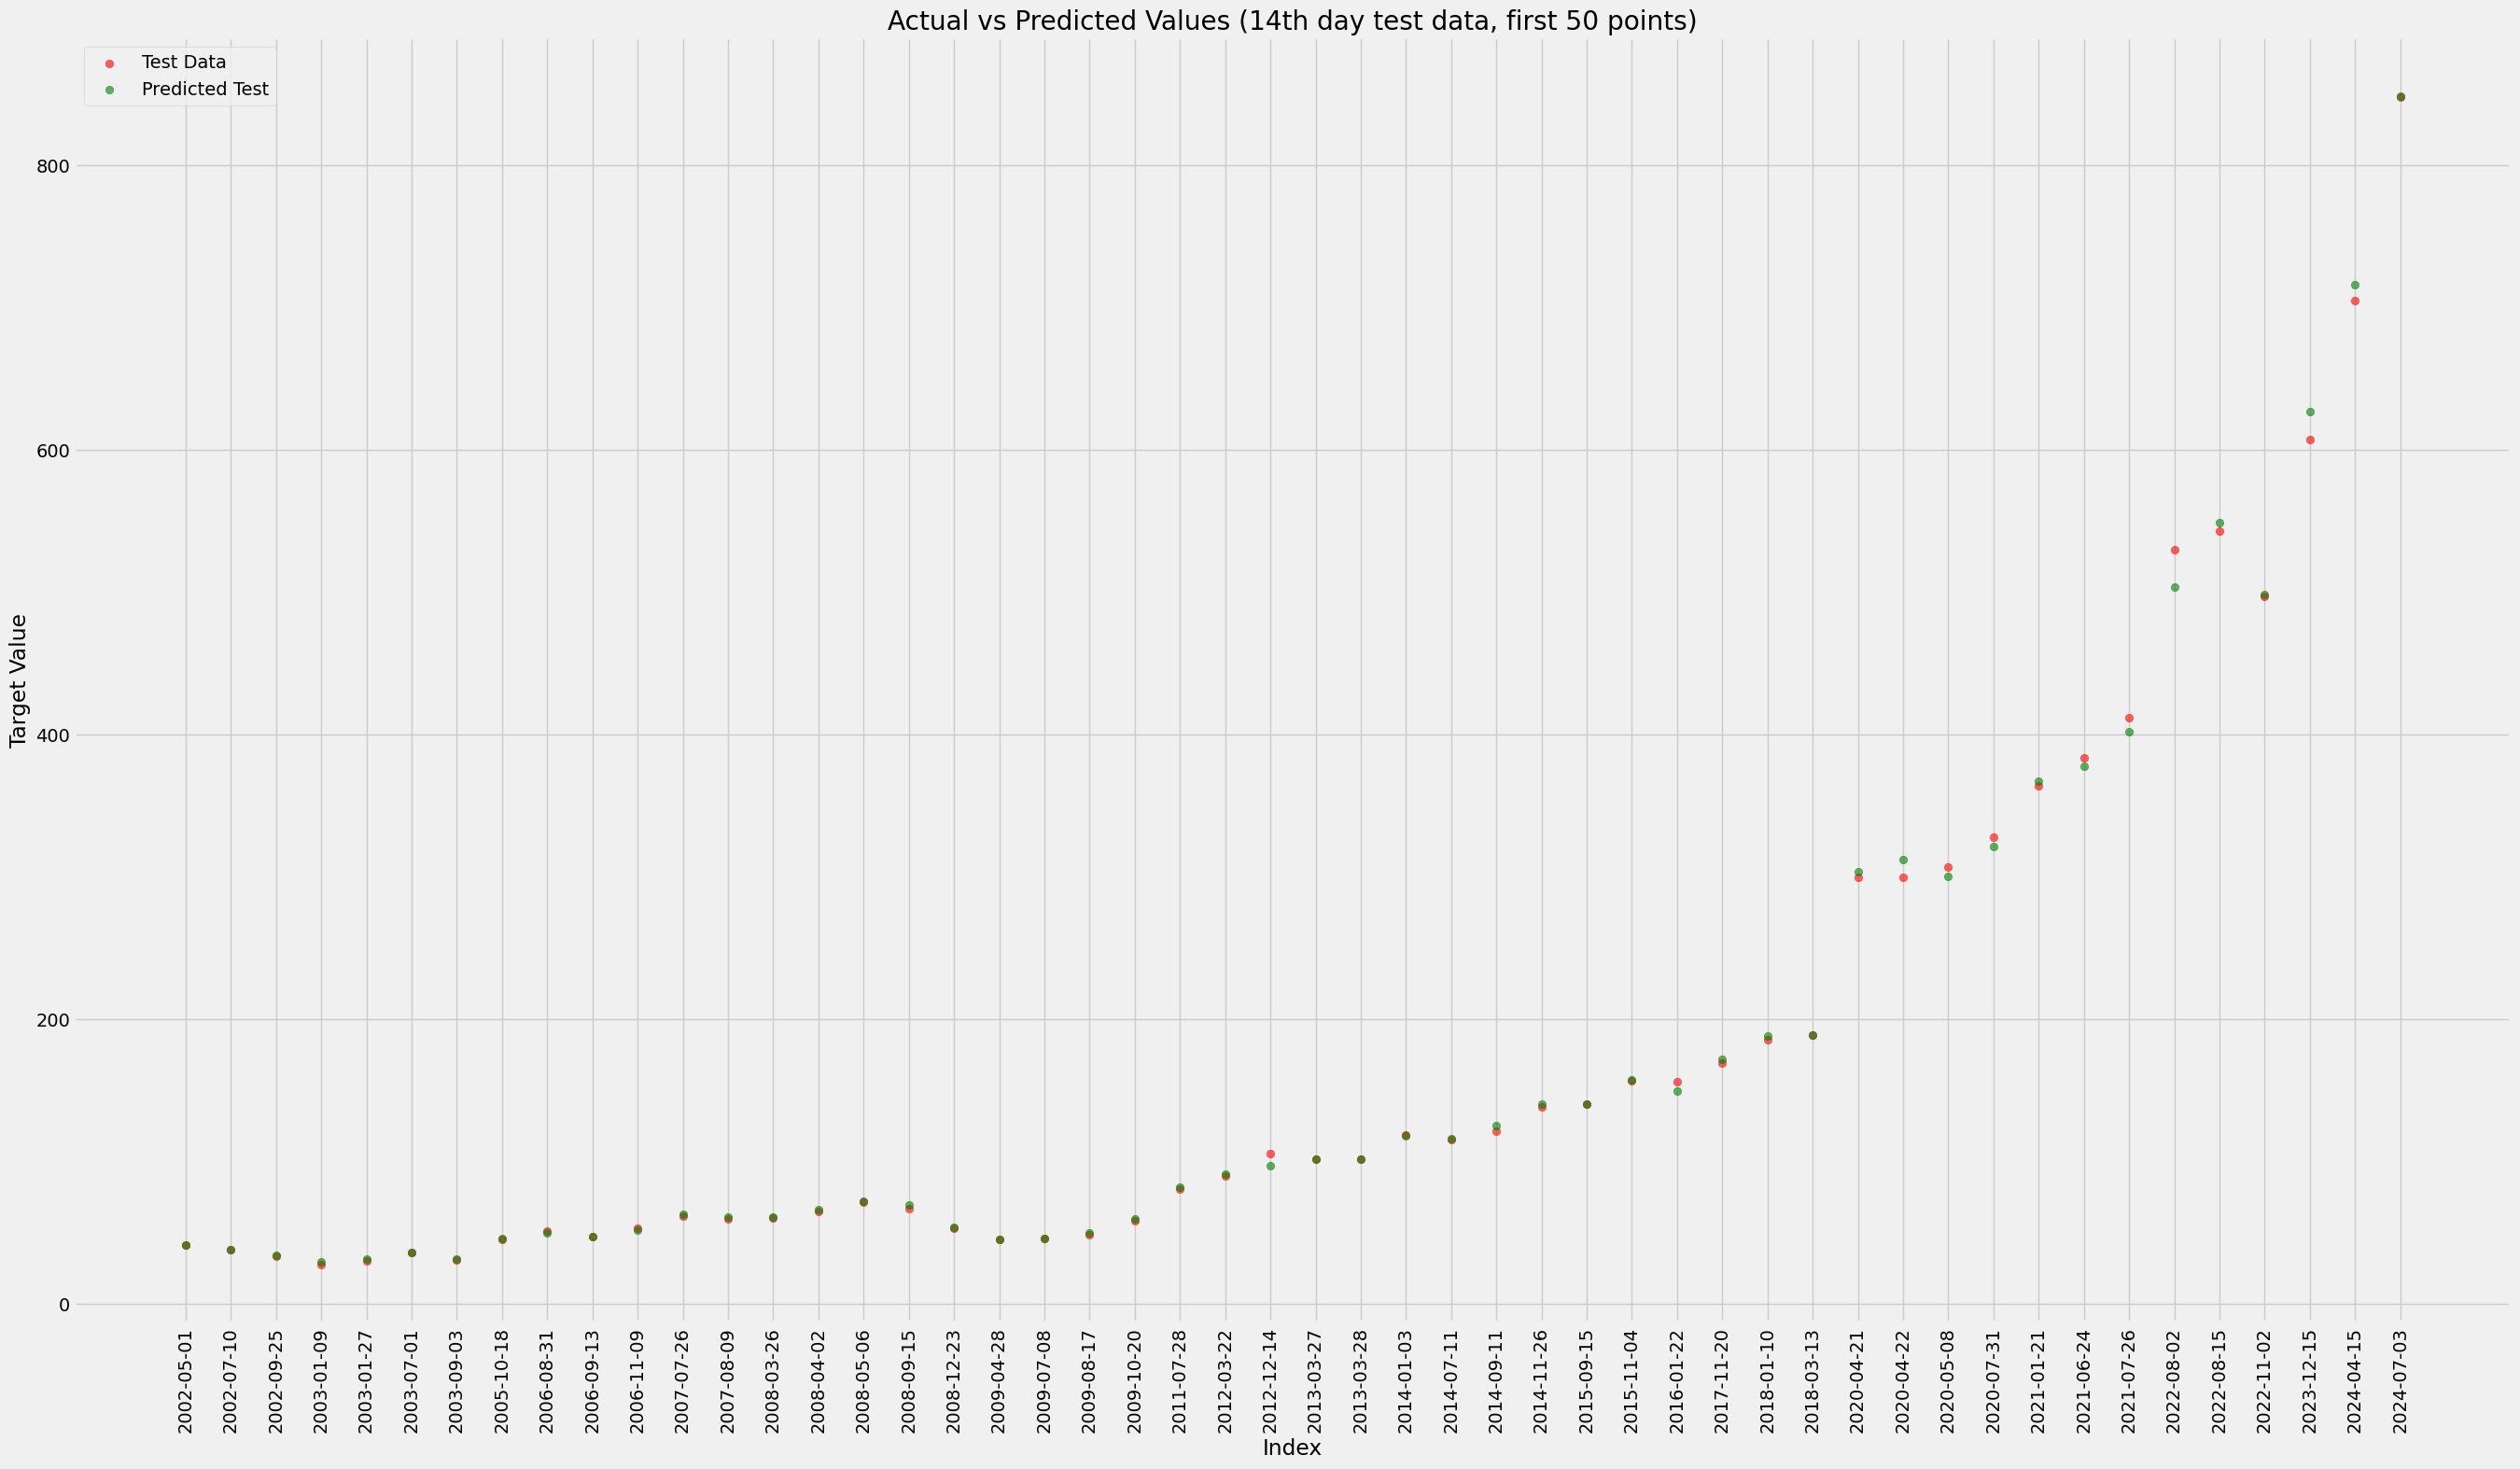

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_test_pred to a Pandas Series and create an index for it
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)

# Create DataFrames/Series with the same index
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

# Plot the subset of the data
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index, y_test_subset, color='red', label='Test Data', alpha=0.6)
plt.scatter(X_test_subset.index, y_test_pred_subset, color='green', label='Predicted Test', alpha=0.6)
plt.title('Actual vs Predicted Values (14th day test data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()

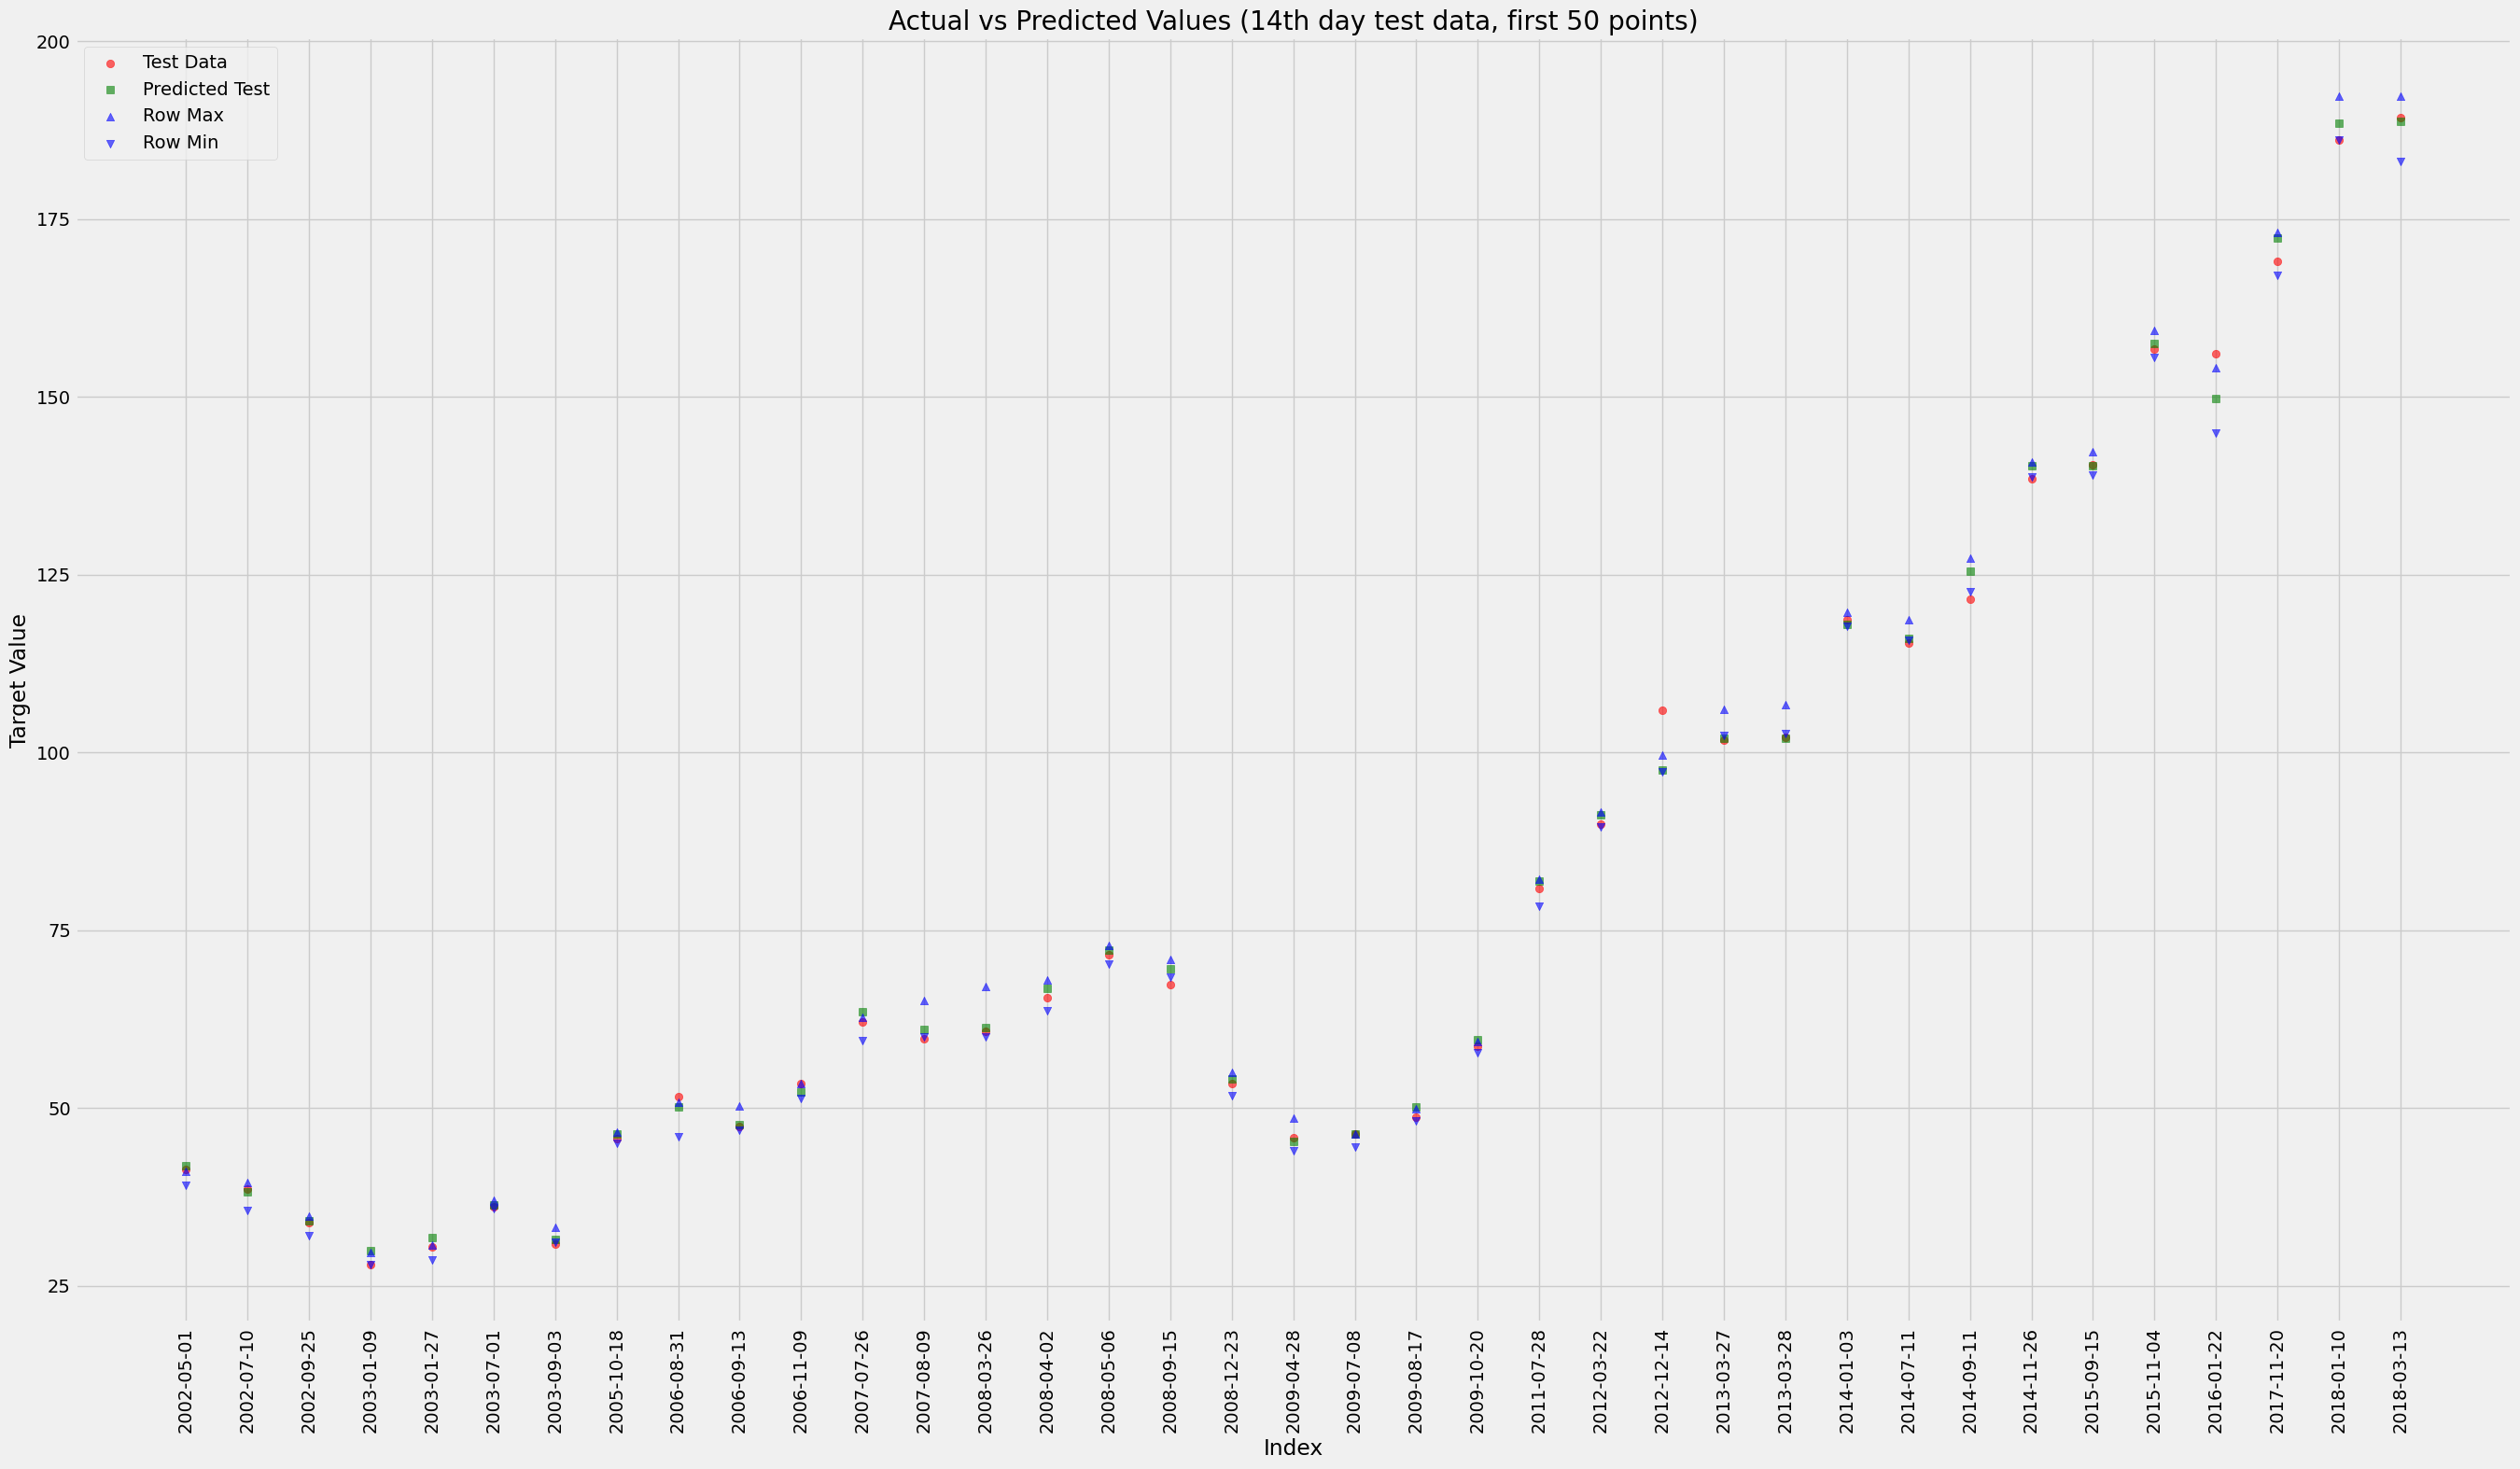

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_test_pred to a Pandas Series and create an index for it
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)

# Create DataFrames/Series with the same index
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

# Extract Row_Max and Row_Min for plotting
row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']

# Plot the subset of the data
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index[0:37], y_test_subset[0:37], color='red', label='Test Data', alpha=0.6, marker='o')
plt.scatter(X_test_subset.index[0:37], y_test_pred_subset[0:37], color='green', label='Predicted Test', alpha=0.6, marker='s')
plt.scatter(X_test_subset.index[0:37], row_max_subset[0:37], color='blue', label='Row Max', alpha=0.6, marker='^')
plt.scatter(X_test_subset.index[0:37], row_min_subset[0:37], color='blue', label='Row Min', alpha=0.6, marker='v')
plt.title('Actual vs Predicted Values (14th day test data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()


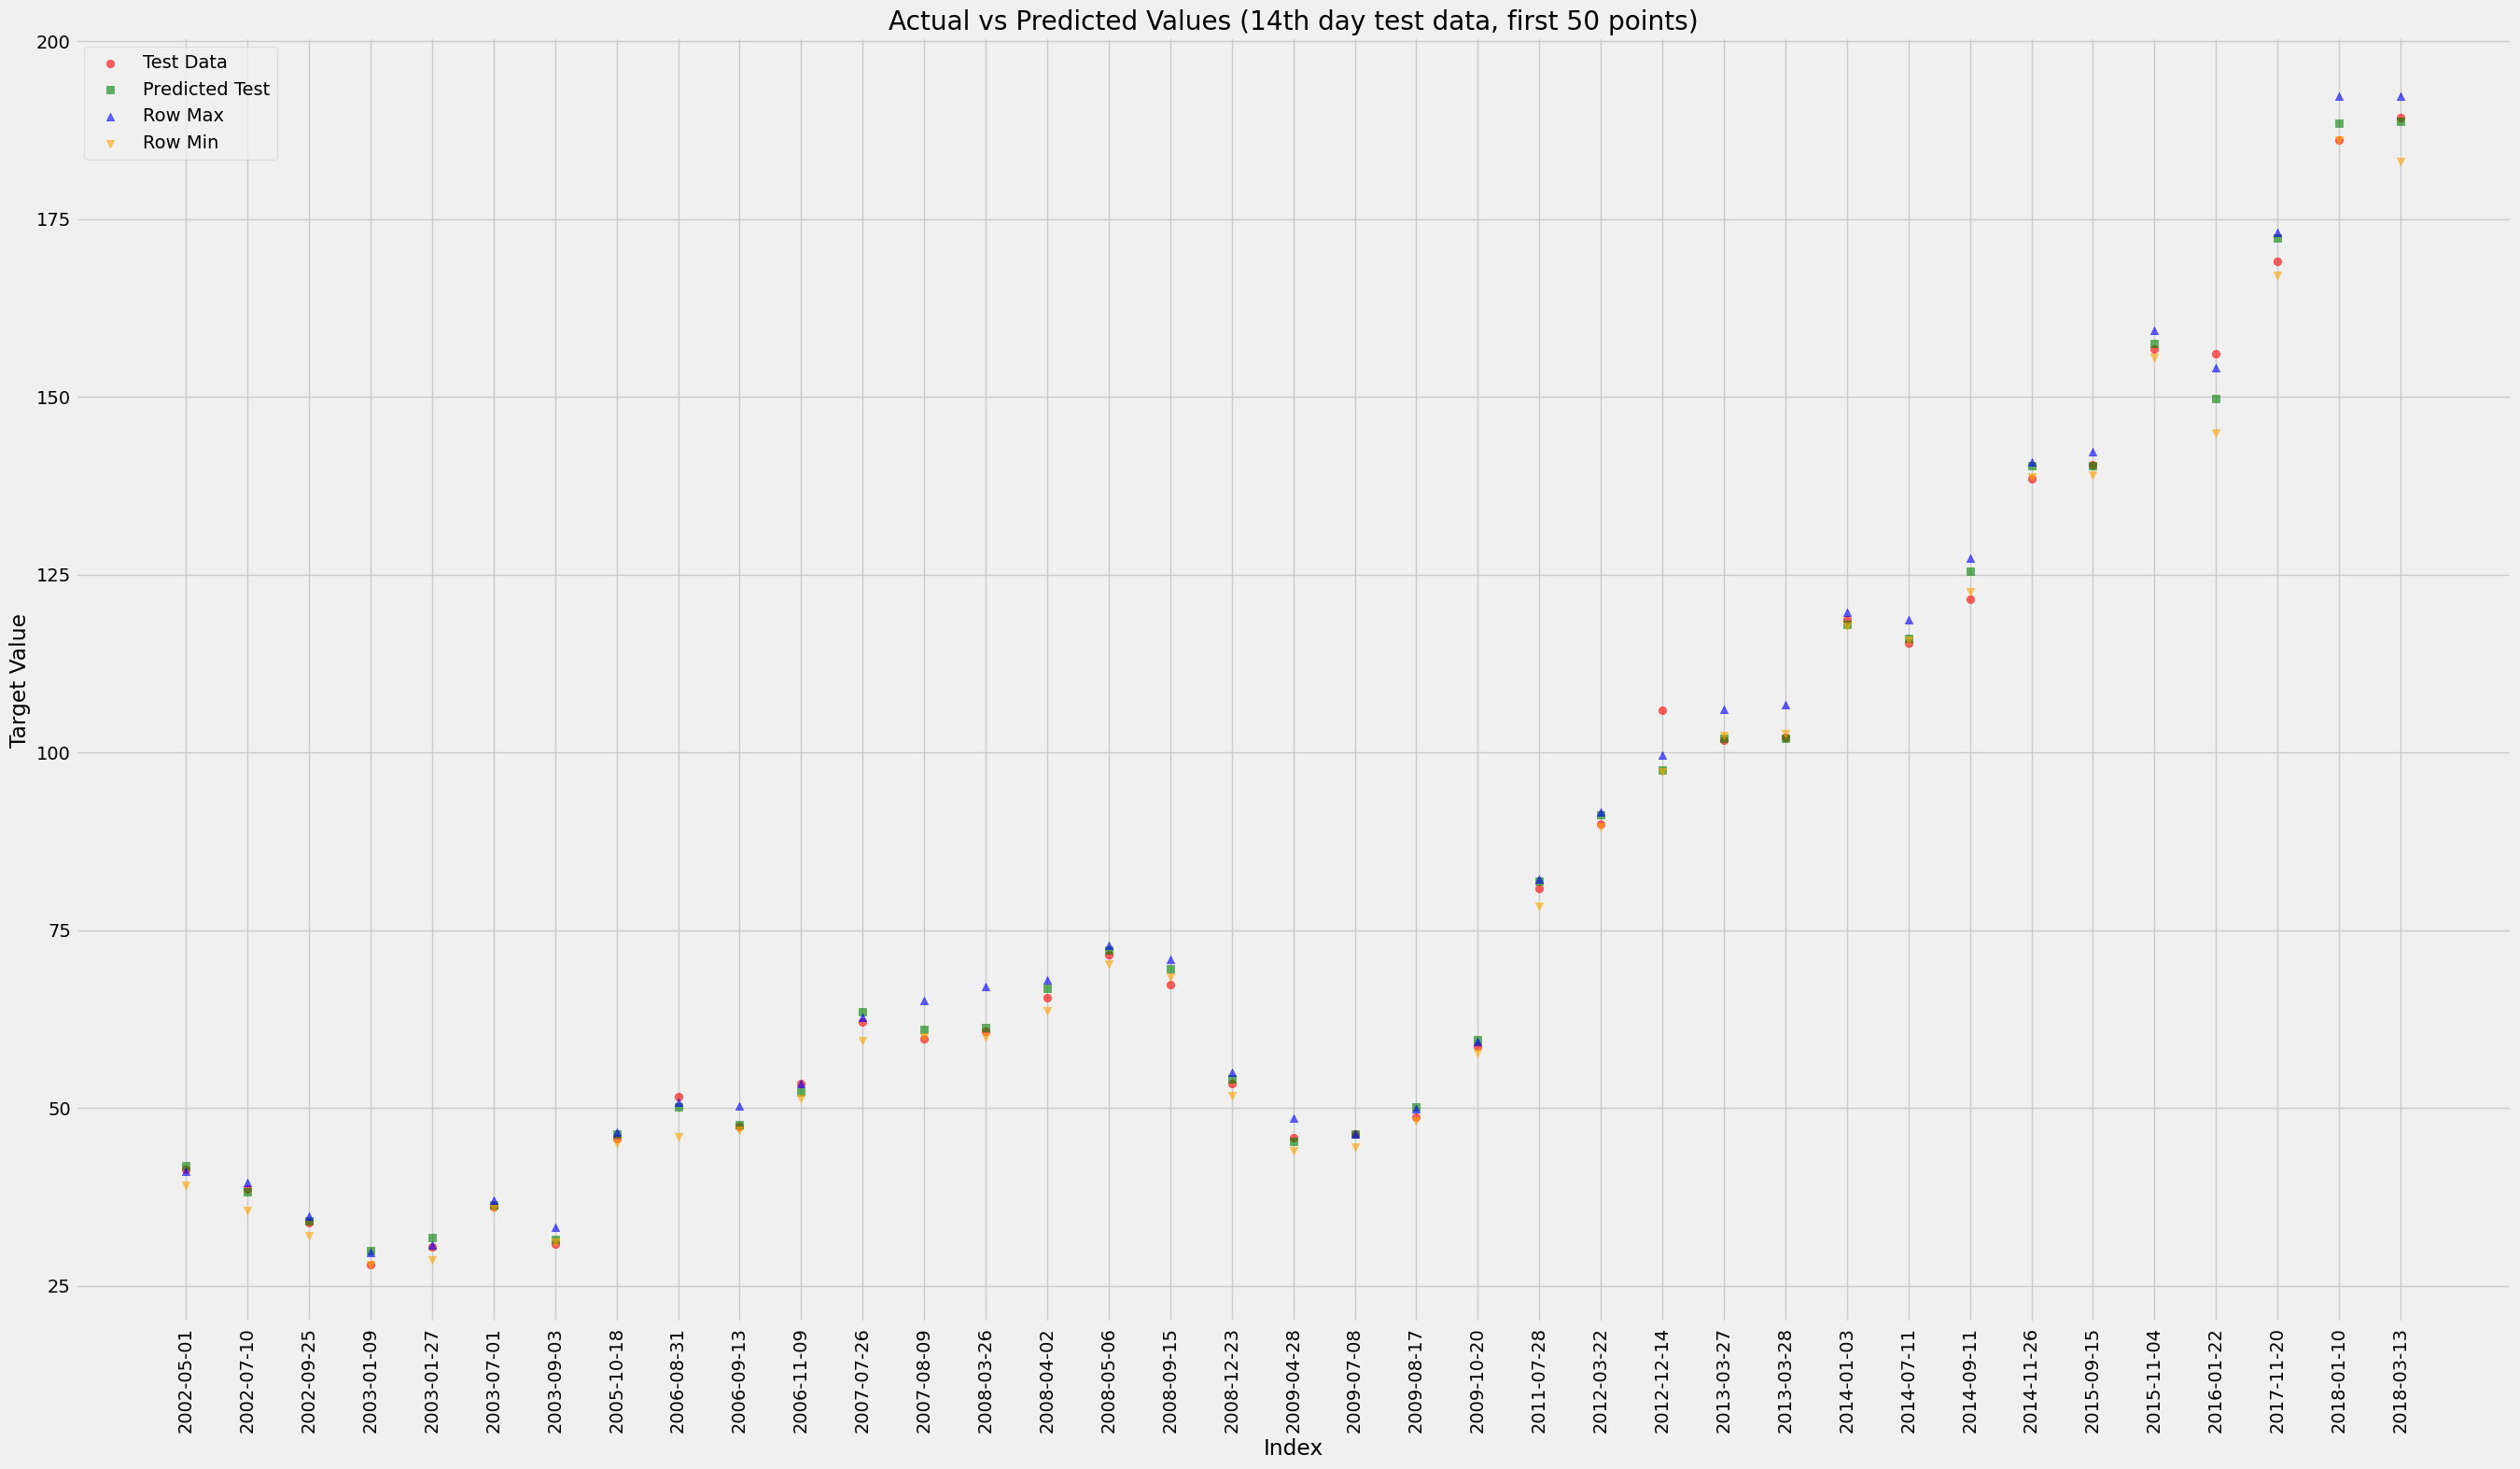

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_test_pred to a Pandas Series and create an index for it
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)

# Create DataFrames/Series with the same index
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

# Extract Row_Max and Row_Min for plotting
row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']

# Plot the subset of the data
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index[0:37], y_test_subset[0:37], color='red', label='Test Data', alpha=0.6, marker='o')
plt.scatter(X_test_subset.index[0:37], y_test_pred_subset[0:37], color='green', label='Predicted Test', alpha=0.6, marker='s')
plt.scatter(X_test_subset.index[0:37], row_max_subset[0:37], color='blue', label='Row Max', alpha=0.6, marker='^')
plt.scatter(X_test_subset.index[0:37], row_min_subset[0:37], color='orange', label='Row Min', alpha=0.6, marker='v')
plt.title('Actual vs Predicted Values (14th day test data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()


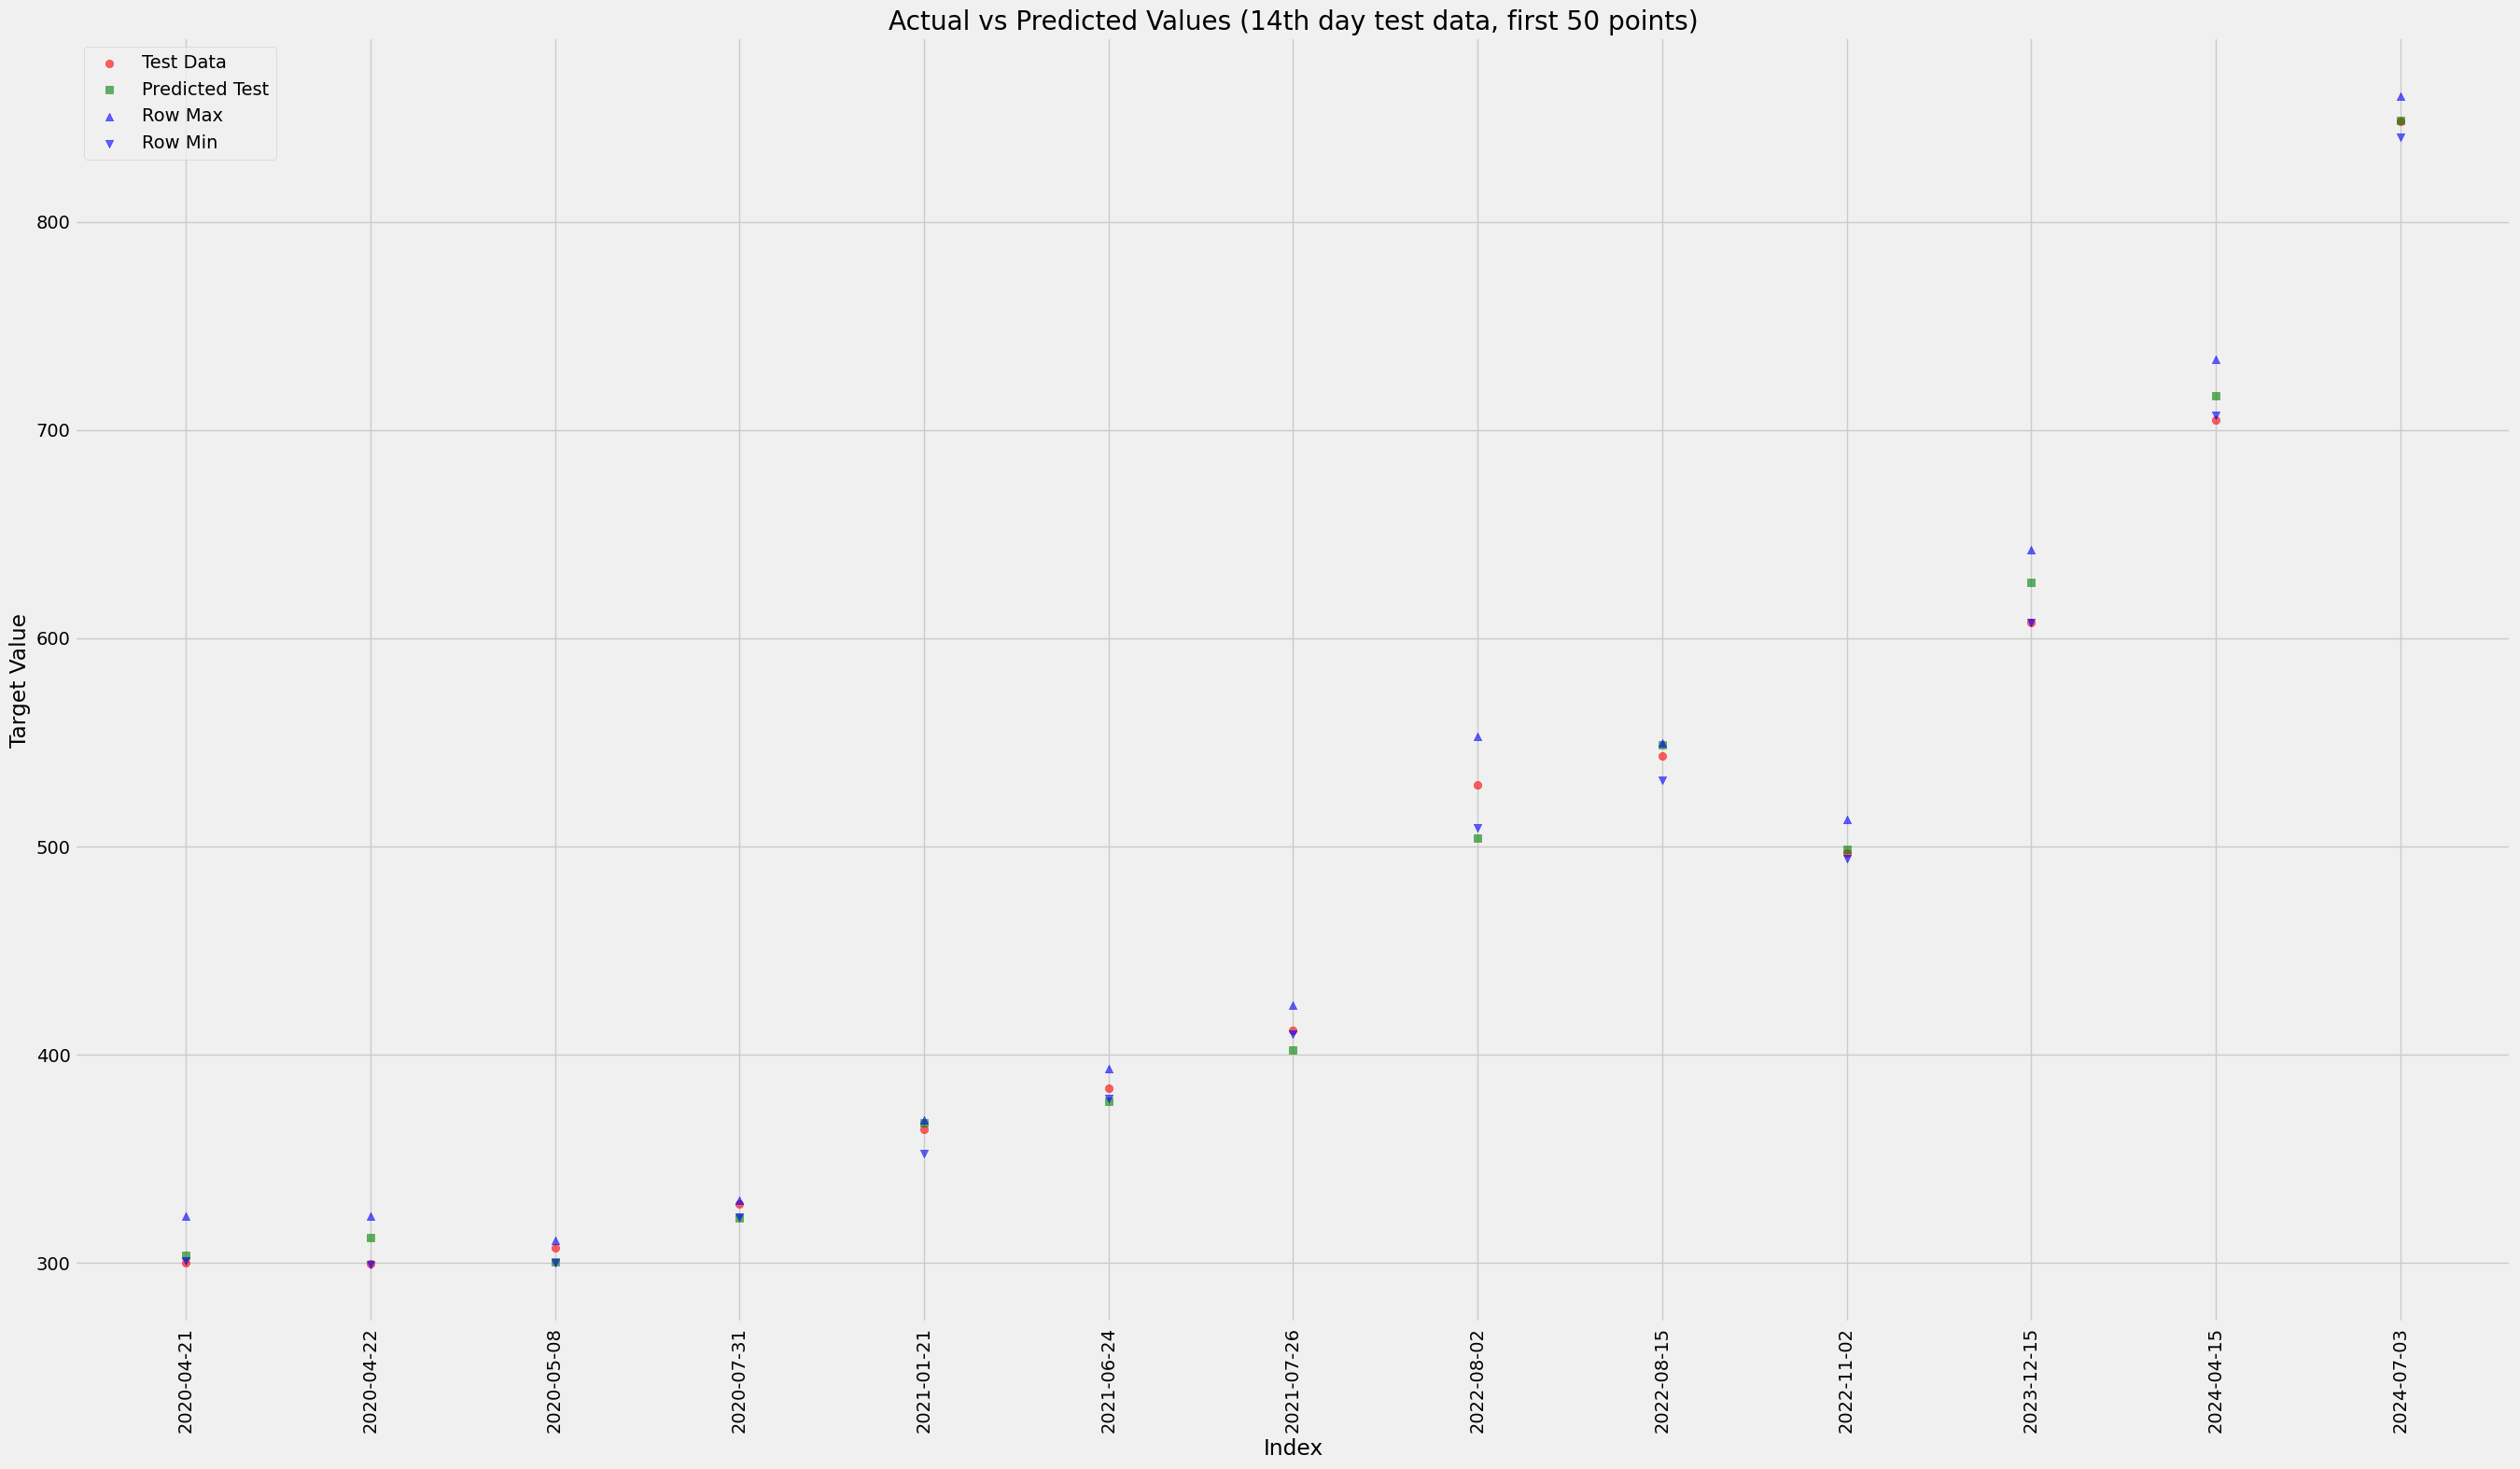

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_test_pred to a Pandas Series and create an index for it
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)

# Create DataFrames/Series with the same index
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

# Extract Row_Max and Row_Min for plotting
row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']

# Plot the subset of the data
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index[37:50], y_test_subset[37:50], color='red', label='Test Data', alpha=0.6, marker='o')
plt.scatter(X_test_subset.index[37:50], y_test_pred_subset[37:50], color='green', label='Predicted Test', alpha=0.6, marker='s')
plt.scatter(X_test_subset.index[37:50], row_max_subset[37:50], color='blue', label='Row Max', alpha=0.6, marker='^')
plt.scatter(X_test_subset.index[37:50], row_min_subset[37:50], color='blue', label='Row Min', alpha=0.6, marker='v')
plt.title('Actual vs Predicted Values (14th day test data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
paired_data_50 = pd.DataFrame({
    'Actual': y_test_subset,
    'Predicted': y_test_pred_subset,
    'Max': X_test['Row_Max'].iloc[:50],
    'Min': X_test['Row_Min'].iloc[:50]
})
paired_data_50

,Actual,Predicted,Max,Min
Date,,,,
2002-05-01,41.360001,41.877518,41.110001,39.200001
2002-07-10,38.619999,38.250011,39.549999,35.650002
2002-09-25,33.830002,34.145088,34.869999,32.090000
2003-01-09,28.020000,29.897463,29.690001,28.040001
2003-01-27,30.450001,31.765812,30.730000,28.690001
2003-07-01,36.090000,36.449638,37.000000,35.820000
2003-09-03,30.889999,31.547636,33.230000,31.190001
2005-10-18,45.639999,46.380497,46.619999,45.049999
2006-08-31,51.590000,50.148163,50.880001,46.000000


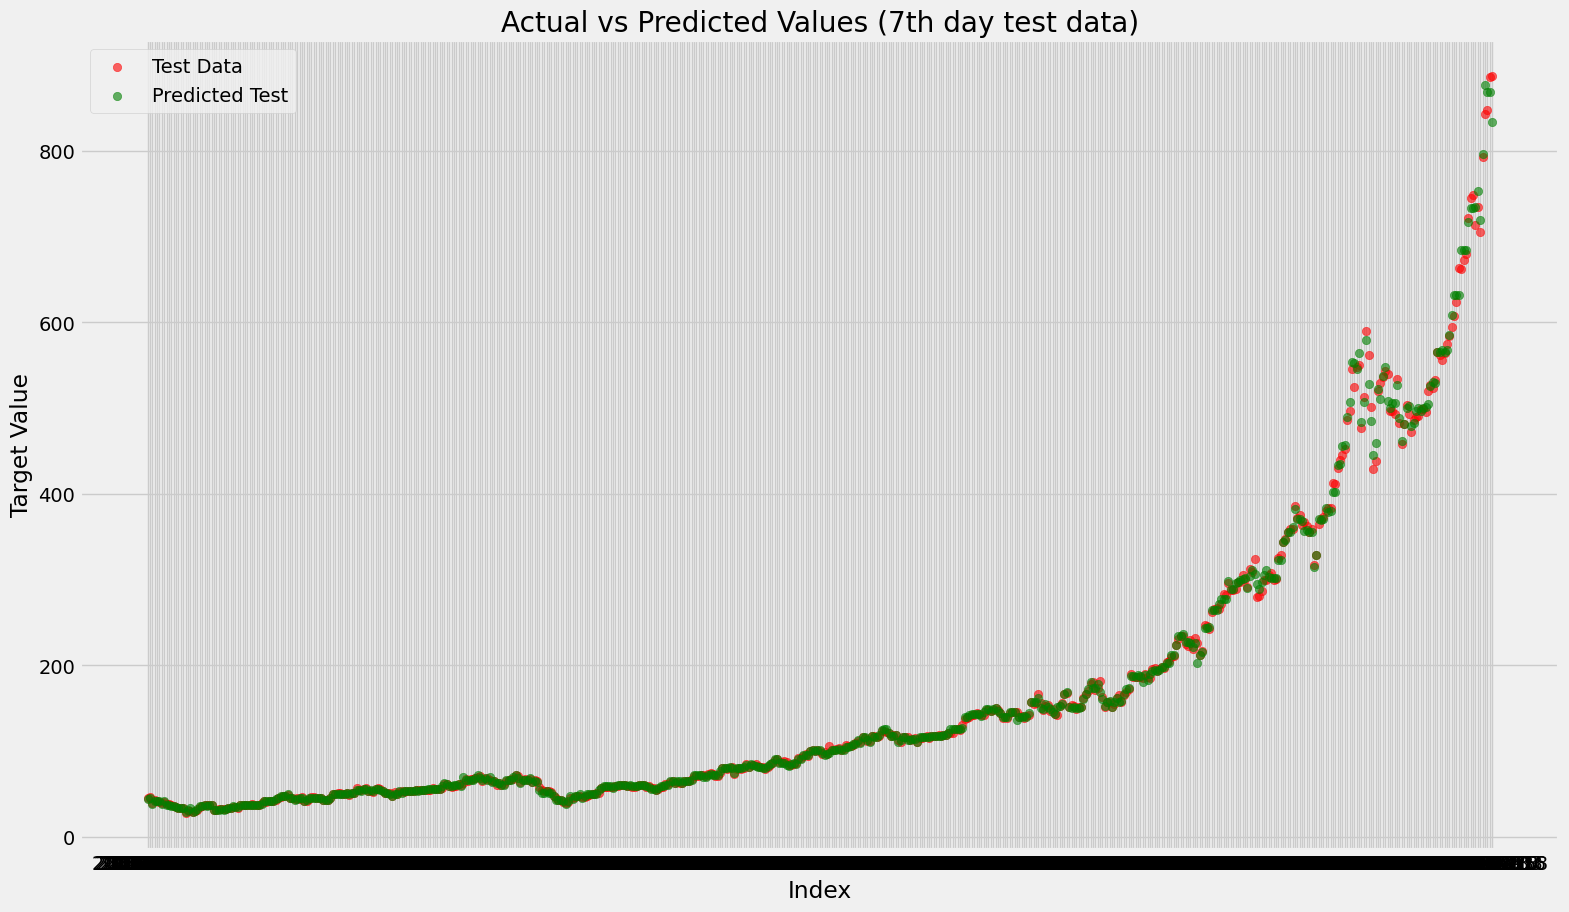

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_test is a DataFrame and y_test, y_test_pred are Series or arrays
# Combine X_test, y_test, and y_test_pred into a DataFrame for sorting
df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

# Sort the DataFrame by index
df_test_sorted = df_test.sort_index()

# Extract the sorted values
X_test_sorted = df_test_sorted.index
y_test_sorted = df_test_sorted['y_test']
y_test_pred_sorted = df_test_sorted['y_test_pred']

# Plot the sorted data
plt.figure(figsize=(17, 10))
plt.scatter(X_test_sorted, y_test_sorted, color='red', label='Test Data', alpha=0.6)
plt.scatter(X_test_sorted, y_test_pred_sorted, color='green', label='Predicted Test', alpha=0.6)
plt.title('Actual vs Predicted Values (7th day test data)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Add legend
plt.legend()

# Show plot
plt.show()


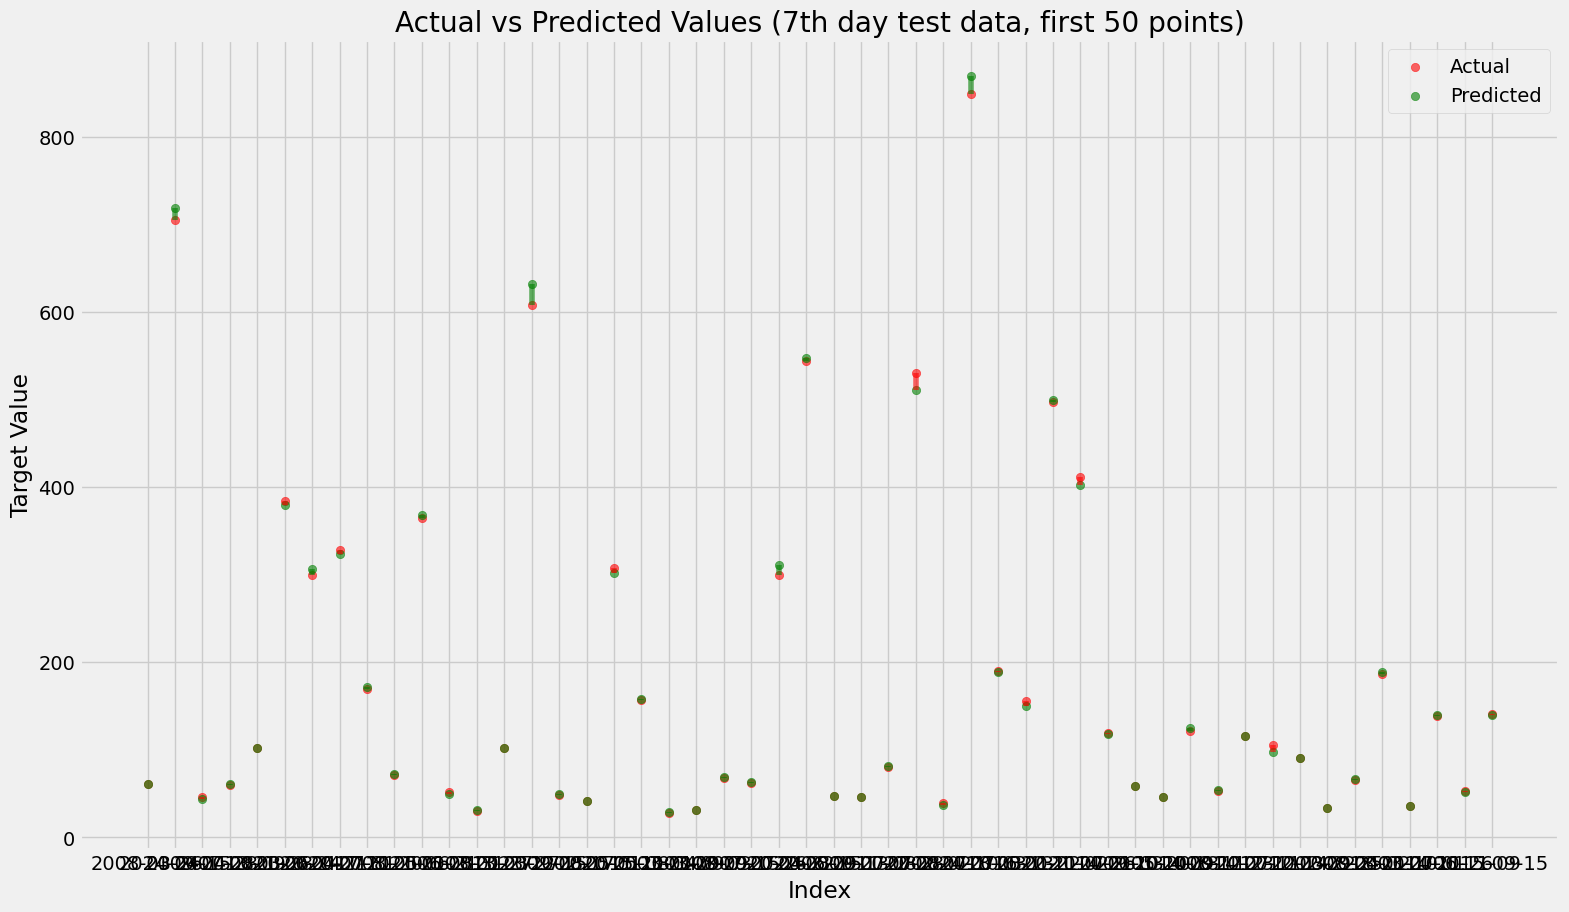

,Actual,Predicted
Date,,
2008-03-26,60.860001,60.692822
2024-04-15,704.880005,718.998047
2009-04-28,45.770000,44.194588
2007-08-09,59.799999,60.579521
2013-03-28,102.120003,101.489082
2021-06-24,383.910004,379.573975
2020-04-21,300.010010,305.900024
2020-07-31,328.299988,322.979004
2017-11-20,169.110001,171.817108


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the first 50 points
X_test_subset = X_test.iloc[:50]
y_test_subset = y_test.iloc[:50]
y_test_pred_subset = y_test_pred[:50]  # Use array slicing for numpy array

# Create the paired DataFrame for the first 50 points
paired_data_50 = pd.DataFrame({
    'Actual': y_test_subset,
    'Predicted': y_test_pred_subset
})

# Display the paired data
paired_data_50

# Plot the subset of the data
plt.figure(figsize=(17, 10))

# Plot the actual and predicted points
plt.scatter(X_test_subset.index, y_test_subset, color='red', label='Actual', alpha=0.6)
plt.scatter(X_test_subset.index, y_test_pred_subset, color='green', label='Predicted', alpha=0.6)

# Plot the lines connecting the points
for i in range(len(X_test_subset)):
    actual = y_test_subset.iloc[i]
    predicted = y_test_pred_subset[i]
    if predicted < actual:
        plt.plot([X_test_subset.index[i], X_test_subset.index[i]], [predicted, actual], color='red', alpha=0.6)
    else:
        plt.plot([X_test_subset.index[i], X_test_subset.index[i]], [actual, predicted], color='green', alpha=0.6)

plt.title('Actual vs Predicted Values (7th day test data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Add legend
plt.legend()

# Show plot
plt.show()
paired_data_50